In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def dataset():
    x = np.arange(1000)
    y = np.sin(x)
    return y[:200], y[950:]

train_data, test_data = dataset()
def sequence_data(data, timesteps = 25):
    x, y = [], []
    for i in range(data.shape[0]-timesteps):
        x.append(data[i:i+timesteps])
        y.append(data[i+timesteps])

    return np.array(x).reshape(len(x),25,1), np.array(y)
x,y = sequence_data(train_data)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(80))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-2), loss = 'mse')

In [13]:
model.fit(x,y, epochs = 50)

Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0423
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3496
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 7.7741e-04
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 6.4736e-04
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 2.4959e-04
Epoch 12/50
6/6 [==============================] - 0s 4ms/step - loss: 2.8971e-04
Epoch 13/50
6/6 [==============================] - 0s 3ms

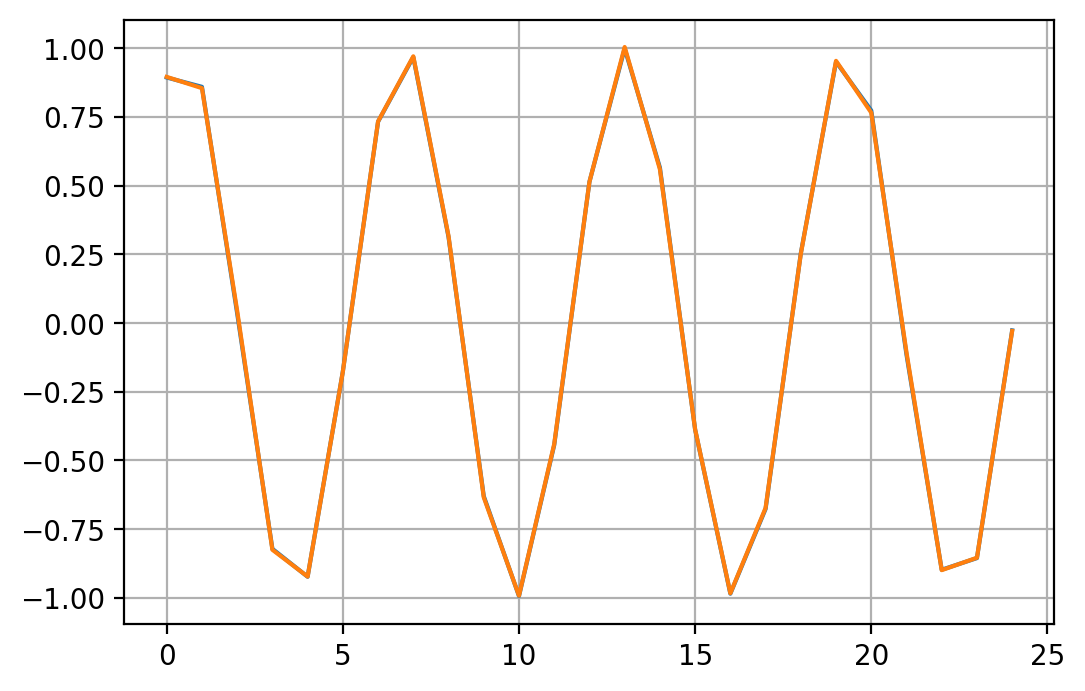

In [14]:
test_x, test_y = sequence_data(test_data)
plt.figure(dpi = 200)
plt.grid()
plt.plot([i for i in range(test_y.shape[0])],test_y,model.predict(test_x))
plt.savefig('Keras-predictions.png')